In [1]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler

from annoy import AnnoyIndex
from ivis import Ivis

/Users/ignat/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
X = datasets.load_iris().data
Y = datasets.load_iris().target

In [3]:
X_scaled = MinMaxScaler().fit_transform(X)

In [4]:
ivis = Ivis(k = 5)
xy = ivis.fit_transform(X_scaled)

Epoch 1/1000
1/1 [==============================] - 1s 920ms/step - loss: 1.1286
Epoch 2/1000
1/1 [==============================] - 0s 8ms/step - loss: 1.1982
Epoch 3/1000
1/1 [==============================] - 0s 21ms/step - loss: 1.0373
Epoch 4/1000
1/1 [==============================] - 0s 7ms/step - loss: 1.0715
Epoch 5/1000
1/1 [==============================] - 0s 6ms/step - loss: 1.0098
Epoch 6/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.9201
Epoch 7/1000
1/1 [==============================] - 0s 9ms/step - loss: 1.0904
Epoch 8/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.6303
Epoch 9/1000
1/1 [==============================] - 0s 15ms/step - loss: 1.0249
Epoch 10/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.6891
Epoch 11/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.8380
Epoch 12/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.8022
Epoch 13/1000
1/1 [=======================

Text(0,0.5,'ivis2')

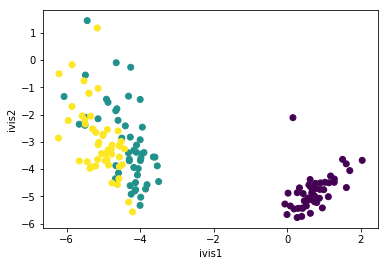

In [5]:
plt.scatter(x=xy[:, 0], y=xy[:, 1], c = Y)
plt.xlabel('ivis1')
plt.ylabel('ivis2')

__ivis__ relies on the AnnoyIndex for similarity search. In cases where a dataset is especially large, AnnoyIndex can be computed directly to disk and then mmapped at load time.

In [31]:
t = AnnoyIndex(f=X.shape[1])
t.on_disk_build('iris.ann')

True

In [32]:
for i in range(X.shape[0]):
    v = X_scaled[i,:]
    t.add_item(i, v)

In [34]:
t.build(-1)
t.unload()

True

Load pre-built AnnoyIndex into __ivis__

In [35]:
t = AnnoyIndex(f=X.shape[1])
t.load('iris.ann')

True

In [37]:
ivis = Ivis(k = 5)
ivis.annoy_index=t

In [38]:
xy = ivis.fit_transform(X_scaled)

Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 1.5659
Epoch 2/1000
1/1 [==============================] - 0s 7ms/step - loss: 1.3262
Epoch 3/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.3736
Epoch 4/1000
1/1 [==============================] - 0s 7ms/step - loss: 1.3375
Epoch 5/1000
1/1 [==============================] - 0s 11ms/step - loss: 1.3340
Epoch 6/1000
1/1 [==============================] - 0s 22ms/step - loss: 1.3562
Epoch 7/1000
1/1 [==============================] - 0s 13ms/step - loss: 1.1644
Epoch 8/1000
1/1 [==============================] - 0s 14ms/step - loss: 1.1679
Epoch 9/1000
1/1 [==============================] - 0s 17ms/step - loss: 1.0296
Epoch 10/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.8677
Epoch 11/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.9212
Epoch 12/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.7767
Epoch 13/1000
1/1 [=======================

Text(0,0.5,'ivis2')

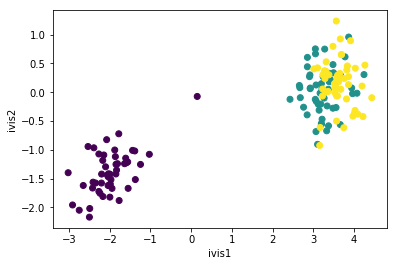

In [39]:
plt.scatter(x=xy[:, 0], y=xy[:, 1], c = Y)
plt.xlabel('ivis1')
plt.ylabel('ivis2')